In [136]:
#importing require python packages
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
from pyspark.sql import SparkSession #loading spark class
from pyspark import SparkConf, SparkContext
import webbrowser
import os

In [152]:
spark = SparkSession.builder.appName("HDFS").getOrCreate()
sparkcont = SparkContext.getOrCreate(SparkConf().setAppName("HDFS")) #creating spark object and initializing it
logs = sparkcont.setLogLevel("ERROR")
filePath = os.path.abspath("Dataset/Youtube.csv")
df = spark.read.option("header","true").csv("file:///"+filePath,inferSchema=True).limit(1000)#now loading dataset using spark
dataset = df.toPandas()
display(dataset)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,latitude,longitude
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,None,10,2017-11-10T17:00:03.000Z,"""Eminem|""""Walk""""|""""On""""|""""Water""""|""""Aftermath/...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,43.65107,-79.347015
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,None,23,2017-11-13T17:00:00.000Z,"""plush|""""bad unboxing""""|""""unboxing""""|""""fan mai...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,43.65107,-79.347015
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,None,23,2017-11-12T19:05:24.000Z,"""racist superman|""""rudy""""|""""mancuso""""|""""king""""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,43.65107,-79.347015
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,None,24,2017-11-12T18:01:41.000Z,"""ryan|""""higa""""|""""higatv""""|""""nigahiga""""|""""i dar...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,43.65107,-79.347015
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,None,10,2017-11-09T11:04:14.000Z,"""edsheeran|""""ed sheeran""""|""""acoustic""""|""""live""...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,43.65107,-79.347015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4T4mt9MuHEI,17.18.11,What will happen to Frank?,The king of DIY,None,15,2017-11-16T19:00:01.000Z,"""aquarium|""""frank the flowerhorn""""|""""flowerhor...",180385,6612,130,3509,https://i.ytimg.com/vi/4T4mt9MuHEI/default.jpg,False,False,False,I know im not going to be able to make another...,43.65107,-79.347015
996,WhnHKIT9124,17.18.11,வாணி ராணி - VAANI RANI - Episode 1419 - 16/11...,RadaanMedia,None,24,2017-11-16T16:30:02.000Z,"""Vaani rani|""""rani""""|""""Radhika in funny charac...",420629,1751,384,158,https://i.ytimg.com/vi/WhnHKIT9124/default.jpg,False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,43.65107,-79.347015
997,cmoknv58jjE,17.18.11,FLIPPING OVER SUPERCAR! *GONE VERY WRONG*,Tanner Braungardt,None,22,2017-11-14T21:00:02.000Z,"""tanner|""""tanner braungardt""""|""""trampoline tri...",2242229,63341,8314,9293,https://i.ytimg.com/vi/cmoknv58jjE/default.jpg,False,False,False,Soooo that happened...\n\nFLIPPER- https://www...,43.65107,-79.347015
998,L5D1gia-b1k,17.18.11,Why President Donald Trump Could Be Brought Ba...,MSNBC,None,25,2017-11-17T16:07:18.000Z,"""Morning Joe|""""Joe Scarborough""""|""""Mika Brzezi...",175969,1683,176,1263,https://i.ytimg.com/vi/L5D1gia-b1k/default.jpg,False,False,False,Mika Brzezinski discusses with the panel the a...,43.65107,-79.347015


In [156]:
#finding top 10 watched videos
dataset = pd.read_csv("Dataset/Youtube.csv", nrows=1000)
videos = dataset.query("category_id == 24").sort_values(by=['views'], ascending=False)
videos = videos[0:18]
fig = px.bar(videos,
             x='video_id',
             y='views',
             color='views',
             color_continuous_scale='Viridis',
             title='Top 10 Videos Watched')
fig.show()

In [84]:
#finding top 10 trending videos
data = dataset[dataset.views > 10000]
#finding top 10 watched videos
videos = data.query("category_id == 1").sort_values(by=['views'], ascending=False)
videos = videos[0:18]
fig = px.bar(videos,
             x='video_id',
             y='views',
             color='views',
             color_continuous_scale='Viridis',
             title='Top 10 Trending Videos Watched')
fig.show()

,video_id,sum
0,n1WpP7iowLc,84978534
1,2Vv-BfVoq4g,72605844
2,9t9u_yPEidY,22523235
3,c64I9HNpiOY,22398892
4,8-Cjsnq8kVU,18930706
5,TyHvyGVs42U,18558186
6,5qpjK5DgCt4,16831388
7,VsYmwBOYfW8,15447715
8,1SiKopOt-QM,15197593
9,JzCsM1vtn78,14535131


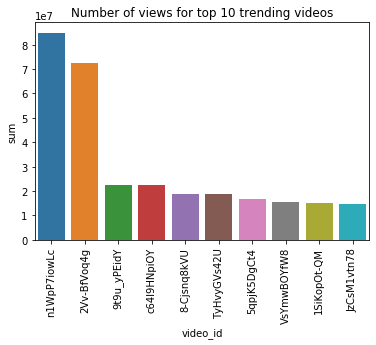

In [85]:
#finding views of top 10 trending videos
data = dataset[dataset.views > 10000]
data = data.groupby('video_id')['views'].agg(['sum'])
data = data.sort_values("sum", ascending=False).reset_index()
data = data.loc[0:9]
display(data)
sns.barplot(data=data, x='video_id', y='sum')
plt.xticks(rotation=90)
plt.title("Number of views for top 10 trending videos")
plt.show()

,Video ID,Likes
0,n1WpP7iowLc,3388654
1,2Vv-BfVoq4g,3355514
2,TyHvyGVs42U,1002566
3,0dBIkQ4Mz1M,942309
4,JzCsM1vtn78,911678
5,ixxR3ZoqnF0,789764
6,nRafaCcfrcI,676393
7,n2K4II8N6r4,673828
8,5qpjK5DgCt4,661872
9,8-Cjsnq8kVU,629832


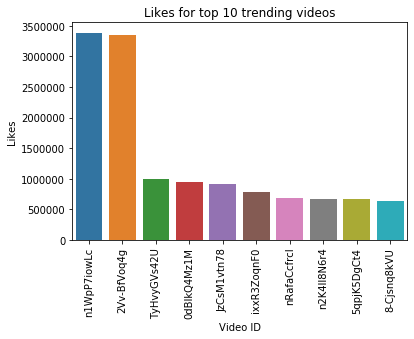

In [86]:
#finding views of top 10 trending videos likes and dis likes
data = dataset[dataset.views > 10000]
data = data.groupby('video_id')['likes'].agg(['sum'])
data = data.sort_values("sum", ascending=False).reset_index()
data = data.loc[0:9]
data.columns = ['Video ID', 'Likes']
display(data)
sns.barplot(data=data, x='Video ID', y='Likes')
plt.xticks(rotation=90)
plt.title("Likes for top 10 trending videos")
plt.show()

,Video ID,Dislikes
0,PRlmRnU9qts,368299
1,n1WpP7iowLc,193131
2,ItYOdWRo0JY,139694
3,2Vv-BfVoq4g,44219
4,9t9u_yPEidY,32766
5,TyHvyGVs42U,32179
6,_uM5kFfkhB8,31076
7,5qpjK5DgCt4,26038
8,2kyS6SvSYSE,25347
9,cxMvzK2OQTw,24414


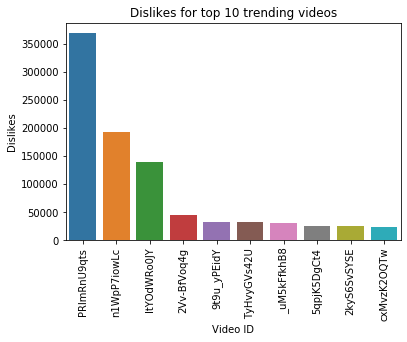

In [87]:
#finding views of top 10 trending videos likes and dis likes
data = dataset[dataset.views > 10000]
data = data.groupby('video_id')['dislikes'].agg(['sum'])
data = data.sort_values("sum", ascending=False).reset_index()
data = data.loc[0:9]
data.columns = ['Video ID', 'Dislikes']
display(data)
sns.barplot(data=data, x='Video ID', y='Dislikes')
plt.xticks(rotation=90)
plt.title("Dislikes for top 10 trending videos")
plt.show()

,Common Word,Count
0,-,324
1,|,303
2,The,118
3,2017,101
4,&,78
...,...,...
95,First,10
96,Sexual,10
97,WWE,10
98,Speed,9


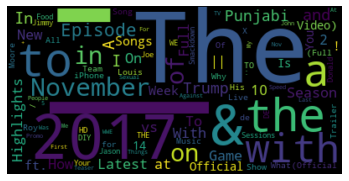

In [78]:
data = Counter(" ".join(dataset["title"]).split()).most_common(100)
df = pd.DataFrame(data, columns=['Common Word','Count'])
display(df)
word_cloud = WordCloud().generate_from_frequencies(dict(data))
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
#YouTube channels have the largest number of trending videos
videos = dataset.query("category_id == 24").sort_values(by=['views'], ascending=False)
videos = videos[0:23]
fig = px.bar(videos,
             x='channel_title',
             y='views',
             color='views',
             color_continuous_scale='Viridis',
             title='Top 10 Videos Watched')
fig.show()

,Category,Count
0,Music,288
1,Entertainment,128
2,File & Animation,104
3,Comedy,92
4,People & Blogs,79
5,Sports,62
6,Politics,53
7,Education,45
8,Gaming,42
9,Styles,26


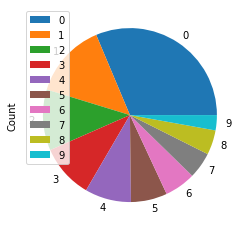

In [115]:
#video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos

data = dataset[dataset.views > 10000]
data = data['category_id'].value_counts()
data = data[0:10]
data = data.values
category = ['Music', 'Entertainment', 'File & Animation', 'Comedy', 'People & Blogs', 'Sports', 'Politics', 'Education', 'Gaming', 'Styles']
temp = []
for i in range(len(data)):
    temp.append([category[i],data[i]])
data = pd.DataFrame(temp, columns=['Category', 'Count'])
display(data)
data.plot(x='Category',y='Count',kind='pie')


,Category,Count
0,Music,115
1,Entertainment,115
2,File & Animation,112
3,Comedy,104
4,People & Blogs,100


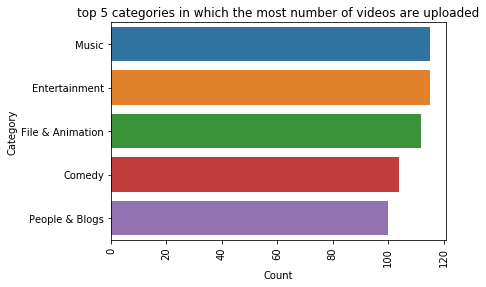

In [124]:
data = dataset.groupby('title')['category_id'].agg(['sum'])
data = data.sort_values("sum", ascending=False).reset_index()
data = data.loc[0:4]
data.columns = ['Category', 'Count']
category = ['Music', 'Entertainment', 'File & Animation', 'Comedy', 'People & Blogs']
data['Category'] = category
display(data)
sns.barplot(data=data, x='Count', y='Category', orient='h')
plt.xticks(rotation=90)
plt.title("top 5 categories in which the most number of videos are uploaded")
plt.show()

In [128]:
#Find top 10 most viewed videos in each category.
category_id = dataset['category_id'][0:10]
category = ['Music', 'Entertainment', 'File & Animation', 'Comedy', 'People & Blogs', 'Sports', 'Politics', 'Education', 'Gaming', 'Styles']
for i in range(len(category_id)):
    videos = dataset.query("category_id == "+str(category_id[i])).sort_values(by=['views'], ascending=False)
    videos = videos[0:23]
    fig = px.bar(videos,
             x='channel_title',
             y='views',
             color='views',
             color_continuous_scale='Viridis',
             title='Top 10 Videos Watched in Category : '+category[i])
    fig.show()


In [132]:
def getMapdata(lat,lon):
    data = '<!DOCTYPE html>'
    data += '<html>' 
    data += '<head>' 
    data += '<meta http-equiv="content-type" content="text/html; charset=UTF-8" />' 
    data += '<title>Youtube User Location</title>' 
    data += '<script src="http://maps.google.com/maps/api/js?sensor=false" type="text/javascript"></script>'
    data += '</head> '
    data += '<body>'
    data += '<div id="map" style="width: 1000px; height: 600px;"></div>'
    data += '<center><br/>'
    data += '{{ data|safe }}'
    data += '<script type="text/javascript">'
    data += 'var lats = '+lat+';'
    data += 'var lons = '+lon+';'
    data += 'var map = new google.maps.Map(document.getElementById("map"), {'
    data += 'zoom: 10,'
    data += '  center: new google.maps.LatLng(lats, lons),'
    data += '  mapTypeId: google.maps.MapTypeId.ROADMAP'
    data += '});'
    data += 'var infowindow = new google.maps.InfoWindow();'
    data += 'var marker, i;'
    data += 'marker = new google.maps.Marker({'
    data += '    position: new google.maps.LatLng(lats,lons),'
    data += '    map: map'
    data += '  });'
    data += 'google.maps.event.addListener(marker, "click", (function(marker, i) {'
    data += 'return function() {'
    data += 'infowindow.setContent("Location");'
    data += 'infowindow.open(map, marker);'
    data += '    }'
    data += '  })(marker, i));'
    data += '</script>'
    data += '</body>'
    data += '</html>'
    return data

In [158]:
import webbrowser
latitude = np.unique(dataset['latitude'])
longitude = np.unique(dataset['longitude'])
data = getMapdata(str(latitude[0]), str(longitude[0]))

f = open("output.html", "w")
f.write(data)
f.close()
webbrowser.open("output.html",new=1)   


True

In [ ]:
data = getMapdata(str(latitude[1]), str(longitude[1]))

f = open("output.html", "w")
f.write(data)
f.close()
webbrowser.open("output.html",new=1)   


In [157]:
data = getMapdata(str(latitude[2]), str(longitude[2]))

f = open("output.html", "w")
f.write(data)
f.close()
webbrowser.open("output.html",new=1)   


IndexError: index 2 is out of bounds for axis 0 with size 1

In [ ]:
data = getMapdata(str(latitude[3]), str(longitude[3]))

f = open("output.html", "w")
f.write(data)
f.close()
webbrowser.open("output.html",new=1)   


In [ ]:
data = getMapdata(str(latitude[4]), str(longitude[4]))

f = open("output.html", "w")
f.write(data)
f.close()
webbrowser.open("output.html",new=1)   
